In [1]:
from os import listdir
from os.path import isdir, join
from tensorflow.keras import datasets, layers, models
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import python_speech_features

In [2]:
# Create list of all targets (minus background noise)
dataset_path = 'C:\\Users\\SuSu\\Desktop\\asr\\data'
all_targets = all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]

print(all_targets)

['go', 'stop']


In [3]:
# Settings
feature_sets_path = 'C:\\Users\\SuSu\\Desktop\\asr'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'wake_word_stop_model.h5'
wake_word = 'stop'

In [4]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename))
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [5]:
# Assign feature sets
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [6]:
# Look at tensor dimensions
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(5710, 16, 16)
(703, 16, 16)
(717, 16, 16)


In [7]:
# Peek at labels
print(y_val)

[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [8]:
# Convert ground truth arrays to one wake word (1) and 'other' (0)
wake_word_index = all_targets.index(wake_word)
y_train = np.equal(y_train, wake_word_index).astype('float64')
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [9]:
# Peek at labels after conversion
print(y_val)

[1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0.

In [10]:
# What percentage of 'stop' appear in validation labels
print(sum(y_val) / len(y_val))
print(1 - sum(y_val) / len(y_val))

0.4992887624466572
0.5007112375533428


In [11]:
# View the dimensions of our input data
print(x_train.shape)

(5710, 16, 16)


In [12]:
# CNN for TF expects (batch, height, width, channels)
# So we reshape the input tensors with a "color" channel of 1
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(5710, 16, 16, 1)
(703, 16, 16, 1)
(717, 16, 16, 1)


In [13]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [14]:
# Build model

model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
# Display model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [16]:
# Add training parameters to model
model.compile(loss='binary_crossentropy', 
              optimizer='rmsprop', 
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [17]:
# Train
history = model.fit(x_train, 
                    y_train, 
                    epochs=30, 
                    batch_size=100, 
                    validation_data=(x_val, y_val))

Train on 5710 samples, validate on 703 samples
Epoch 1/30
5710/5710 [==============================] - 3s 473us/sample - loss: 0.5704 - acc: 0.7102 - val_loss: 0.4474 - val_acc: 0.8051
Epoch 2/30
5710/5710 [==============================] - 0s 38us/sample - loss: 0.3827 - acc: 0.8292 - val_loss: 0.4176 - val_acc: 0.7980
Epoch 3/30
5710/5710 [==============================] - 0s 39us/sample - loss: 0.3121 - acc: 0.8676 - val_loss: 0.4035 - val_acc: 0.8179
Epoch 4/30
5710/5710 [==============================] - 0s 38us/sample - loss: 0.2516 - acc: 0.8984 - val_loss: 0.2058 - val_acc: 0.9189
Epoch 5/30
5710/5710 [==============================] - 0s 38us/sample - loss: 0.2177 - acc: 0.9086 - val_loss: 0.1786 - val_acc: 0.9260
Epoch 6/30
5710/5710 [==============================] - 0s 38us/sample - loss: 0.1976 - acc: 0.9242 - val_loss: 0.2490 - val_acc: 0.8933
Epoch 7/30
5710/5710 [==============================] - 0s 39us/sample - loss: 0.1712 - acc: 0.9331 - val_loss: 0.2288 - val_acc: 

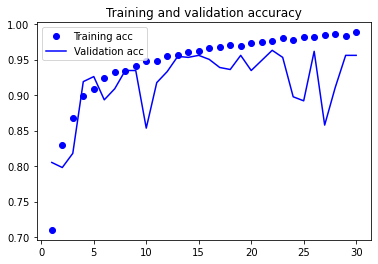

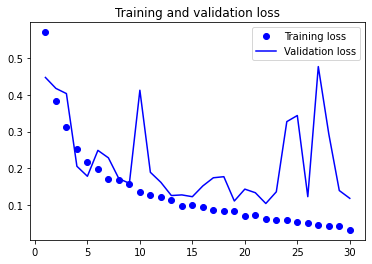

In [18]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
# Save the model as a file
models.save_model(model, model_filename)

In [20]:
# See which are 'stop'
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx)

0
1
2
3
6
7
8
11
12
14
17
18
20
21
24
25
26
29
31
32
33
35
36
37
40
41
42
43
44
46
49
53
54
60
61
62
64
69
71
72
76
77
83
86
88
91
93
94
95
96
98
99
100
104
108
110
114
116
117
118
120
123
124
125
126
127
128
130
132
135
140
143
145
146
148
149
150
151
152
154
155
157
159
164
165
166
168
171
173
174
175
177
178
179
180
184
185
188
189
190
193
196
198
201
206
207
212
215
219
221
224
225
227
228
229
230
233
236
239
241
243
246
247
248
250
254
256
267
272
273
275
284
286
287
292
293
294
295
298
300
301
305
308
310
311
312
314
315
316
317
319
321
322
323
325
327
329
332
334
336
340
346
348
352
354
355
357
358
359
360
361
364
366
368
369
370
371
372
373
376
378
381
382
383
385
386
388
390
391
392
395
396
397
398
400
402
403
405
406
407
409
410
411
412
413
414
415
417
418
421
422
425
426
427
429
433
434
435
437
440
441
442
443
445
448
452
457
460
461
463
466
468
470
473
474
475
480
482
483
484
486
488
490
491
492
493
495
496
497
499
502
503
505
508
509
510
511
512
513
514
515
517
518
519
521

In [21]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(100, 110):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Answer: 1.0  Prediction: [[1.]]
Answer: 0.0  Prediction: [[0.00049439]]
Answer: 0.0  Prediction: [[5.9458405e-05]]
Answer: 0.0  Prediction: [[1.2909099e-07]]
Answer: 1.0  Prediction: [[0.9999999]]
Answer: 0.0  Prediction: [[1.7517488e-05]]
Answer: 0.0  Prediction: [[0.4887876]]
Answer: 0.0  Prediction: [[0.]]
Answer: 1.0  Prediction: [[0.99999964]]
Answer: 0.0  Prediction: [[0.00027354]]


In [22]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

717/717 [==============================] - 0s 216us/sample - loss: 0.0946 - acc: 0.9693


[0.09462320143707627, 0.9693166]

In [23]:
import librosa

C:\Users\SuSu\Anaconda3\envs\jarvis\lib\site-packages\librosa\util\decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [24]:
testing_path = 'C:\\Users\\SuSu\\Desktop\\asr\\test'

sample_rate = 8000 # .wev file sampled in 16kHz 
num_mfcc = 16
len_mfcc = 16

In [25]:
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=2048,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [26]:
path = join(testing_path, 'go1.wav')
mfccs = calc_mfcc(path)

MFCCs: [[-7.52295158e+01 -7.12652946e+01 -6.08161838e+01 -5.48067128e+01
  -4.02167439e+01 -2.62191424e+01 -1.90794980e+01 -1.71308443e+01
  -1.89370278e+01 -2.31422547e+01 -2.98229698e+01 -4.10065361e+01
  -5.33042977e+01 -6.20221425e+01 -6.77642870e+01 -7.08637222e+01]
 [-3.79180304e+00 -6.94106198e+00  4.00380029e+00  1.40394861e+01
   1.75159347e+01  1.43986146e+01  1.32886841e+01  1.31133850e+01
   1.40807422e+01  1.54733359e+01  1.62612341e+01  1.70390664e+01
   1.88141855e+01  1.86796626e+01  1.62847910e+01  1.36864747e+01]
 [ 1.36011352e+01  1.37731244e+01  1.76005788e+01  1.60181415e+01
   3.89179267e+00  2.00460192e+00  2.42846674e+00  3.59003768e+00
   5.40793290e+00  7.00828311e+00  8.41150113e+00  9.11327722e+00
   7.15240231e+00  6.37964255e+00  6.41489745e+00  6.25991723e+00]
 [-7.41664407e-01 -8.94320480e-01 -8.97280739e-01 -1.47867132e+00
  -2.32963559e+00 -4.15128868e+00 -5.47044142e+00 -6.49428523e+00
  -7.06111154e+00 -7.19089735e+00 -7.03191257e+00 -5.86463656e+00


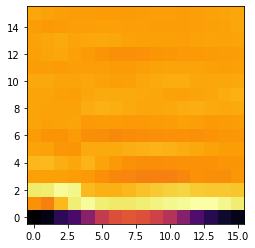

In [27]:
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

In [28]:
print(mfccs.shape)

mfccs = mfccs.reshape(mfccs.shape[0], 
                      mfccs.shape[1],  
                      1)

print(mfccs.shape)

(16, 16)
(16, 16, 1)


In [29]:
#model_out = model.predict(mfccs) 
out = model.predict(np.expand_dims(mfccs, 0))

In [31]:
print(out)
print(tf.__version__)

[[2.32926e-07]]
1.15.0


In [33]:
if out > 0.5:
    value = 'stop'
else:
    value = 'go'

In [88]:
print(value)

go
